### Creating heatmaps for the our summary of the results figure
We generated a heatmap of the mean difference in response between the test condition and symmetric DMSO for each strain. This plot will go into our "results summary" figure

#### Reading in the packages and the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dat = pd.read_csv('/Users/Emily/Documents/S1F2/all_strains_mdiff_dmso.csv', index_col=0)

In [16]:
#Getting rid of columns we don't need
dat = dat.drop(['control', 'control_N', 'test_N', 'effect_size', 'bca_low', 'bca_high', 'pvalue_mann_whitney', 'statistic_mann_whitney'], axis=1)
dat.head()

,test,difference,Strain
0,(-)-Huperzine A,2.506552,PR678
1,1-octanol,-3.953032,PR678
2,"2,3-Dihydrobenzofuran",6.791056,PR678
3,"2,5-Dihydroxybenzoic acid",1.256955,PR678
4,2-Methyl-1-butanol,1.722631,PR678


In [39]:
#Creating a wide DF to pass to the plotting package
pdat = dat.pivot(index='test', columns='Strain', values='difference')
pdat.head()

Strain,CX10,GN1077,N2,PR678
test,,,,
(-)-Huperzine A,0.282733,-0.434662,3.377967,2.506552
1-octanol,-1.173355,-0.040677,-7.446258,-3.953032
"2,3-Dihydrobenzofuran",9.735851,-1.424593,9.194467,6.791056
"2,5-Dihydroxybenzoic acid",-1.519682,-0.757694,2.462995,1.256955
2-Methyl-1-butanol,10.784048,-2.090040,11.712247,1.722631


In [40]:
pdat.reset_index()

Strain,test,CX10,GN1077,N2,PR678
0,(-)-Huperzine A,0.282733,-0.434662,3.377967,2.506552
1,1-octanol,-1.173355,-0.040677,-7.446258,-3.953032
2,"2,3-Dihydrobenzofuran",9.735851,-1.424593,9.194467,6.791056
3,"2,5-Dihydroxybenzoic acid",-1.519682,-0.757694,2.462995,1.256955
4,2-Methyl-1-butanol,10.784048,-2.090040,11.712247,1.722631
5,2-nonanone,-3.744640,-2.109201,-4.575976,-6.325735
6,Acetophenone,1.138951,-2.662677,5.238403,-4.155159
7,Anisole,4.986971,-0.644143,3.016755,6.443394
8,Camphor,1.567913,-0.214094,-2.756356,1.511301
9,Carnosol,1.664123,-0.378642,2.520538,6.715551


In [31]:
pdat.head()

Strain,CX10,GN1077,N2,PR678
Index,,,,
(-)-Huperzine A,0.282733,-0.434662,3.377967,2.506552
1-octanol,-1.173355,-0.040677,-7.446258,-3.953032
"2,3-Dihydrobenzofuran",9.735851,-1.424593,9.194467,6.791056
"2,5-Dihydroxybenzoic acid",-1.519682,-0.757694,2.462995,1.256955
2-Methyl-1-butanol,10.784048,-2.090040,11.712247,1.722631


Sorting the data in descending order

In [10]:
sortdat = df.sort_values(by='N2', ascending=False)

In [11]:
sortdat.index

Index(['Isoamyl alcohol', '2-Methyl-1-butanol', 'Thiophene',
       '2,3-Dihydrobenzofuran', 'Diacetyl', 'Phenylacetylene', 'Paeoniflorin',
       'α-Phellandrene', 'Acetophenone', 'Coumaran', 'Leonurine',
       'Guaiazulene', 'L-Mimosine', 'Solasodine', 'Isoquinoline', 'Furfural',
       '(-)-Huperzine A', 'Anisole', 'Limonin', 'Cinnamyl Alcohol',
       'Piperitenone', 'Ethyl palmitate', 'Carnosol',
       '2,5-Dihydroxybenzoic acid', 'p-Tolualdehyde', 'Lapachol',
       'Piperonyl Alcohol', 'Sabinene', 'Sinomenine hydrochloride', 'H2O',
       'Oleanolic Acid', 'Daucosterol', 'Ethyl p-methoxycinnamate',
       'Methyl palmitate', 'Ursolic acid', 'Camphor', 'Spinosad',
       'Salvinorin A Propionate', 'Ellagic acid', '2-nonanone', 'Phytol',
       '1-octanol'],
      dtype='object')

#### Creating subsets of the data based on the dependency of OSM-9 only, TAX-4 only or both TAX-4 and OSM-9 signaling

In [13]:
sortdat = sortdat.rename(columns = {'Strain':'Test'})
sortdat.head()

Strain,N2,PR678,CX10,GN1077
Isoamyl alcohol,14.166999,3.360917,11.387340,-1.151320
2-Methyl-1-butanol,11.712247,1.722631,10.784048,-2.090040
Thiophene,9.759898,2.924812,1.565215,-1.322190
"2,3-Dihydrobenzofuran",9.194467,6.791056,9.735851,-1.424593
Diacetyl,8.018781,12.023675,3.997838,-0.553237


In [71]:
vchange = ['Phytol', 'Ellagic acid', 'Salvinorin A Propionate',
          'Spinosad', 'Ursolic acid', 'Methyl palmitate', 'Daucosterol',
          'Oleanolic Acid', 'Piperonyl Alcohol', 'Acetophenone']
osm9 = ['Leonurine', 'L-Mimosine', 'Solasodine']

tax4 = ['Isoamyl alcohol', '2-Methyl-1-butanol', 'Furfural', 'p-Tolualdehyde']

both = ['Thiophene', '2,3-Dihydrobenzofuran', 'Diacetyl', 'Phenylacetylene',
       'Paeoniflorin', 'α-Phellandrene', 'Coumaran', 'Isoquinoline', '(-)-Huperzine A',
       'Anisole', 'Limonin', 'Piperitenone', 'Sabinene', 'Camphor', '2-nonanone', '1-octanol']

In [42]:
p = dat.pivot(index='test', columns='Strain', values='difference').reset_index()
p = p.rename(columns = {'test':'Compound'})
p= p[['Compound','N2', 'PR678', 'CX10', 'GN1077']]
p.head()

Strain,Compound,N2,PR678,CX10,GN1077
0,(-)-Huperzine A,3.377967,2.506552,0.282733,-0.434662
1,1-octanol,-7.446258,-3.953032,-1.173355,-0.040677
2,"2,3-Dihydrobenzofuran",9.194467,6.791056,9.735851,-1.424593
3,"2,5-Dihydroxybenzoic acid",2.462995,1.256955,-1.519682,-0.757694
4,2-Methyl-1-butanol,11.712247,1.722631,10.784048,-2.090040


In [75]:
vc = p.loc[p['Compound'].isin(vchange)]
o9 = p.loc[p['Compound'].isin(osm9)]
t4 = p.loc[p['Compound'].isin(tax4)]
bth = p.loc[p['Compound'].isin(both)]
subs = [vc, o9, t4, bth]

In [83]:
def phmp(stuff):
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(stuff,  vmax=13, vmin=-13, center=0, cmap='vlag', square=True)
    ax.tick_params(bottom=False, left=False)
    plt.xticks(rotation=45)
    #plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
    
    plt.savefig('/Users/Emily/Desktop/CB4856_screen/poster_imgs/' + str(len(stuff)) + '.svg')

#### Creating a plotting function to plot all 4 ion channel signaling subsets

[None, None, None, None]

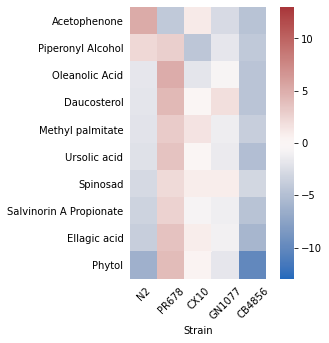

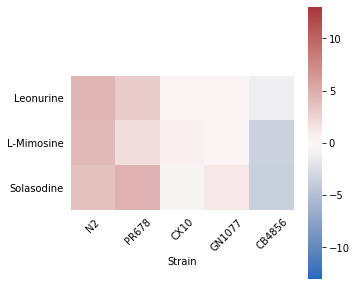

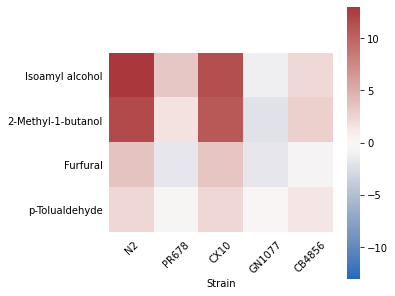

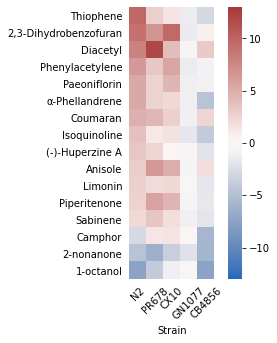

In [84]:
def new_idx(dat):
    df = dat.set_index('Compound').rename_axis(None)
    #cols = list(dat.columns)

    #a, b, c, d,e = cols.index('CX10'), cols.index('N2'), cols.index('GN1077'), cols.index('PR678'), cols.index('CB4856')
    #cols[b], cols[a], cols[d], cols[c], cols[e] = cols[a], cols[b], cols[c], cols[d], cols[e]
    #df = dat[cols]
    df = df.sort_values(by='N2', ascending=False)
    phmp(df)
    #return df

[new_idx(x) for x in subs]

In [49]:
pd = p.set_index('Compound').rename_axis(None)
sns.heatmap(pd,  vmax=20, vmin=-20, center=0, cmap='vlag', square=True)
#ax.tick_params(bottom=False, left=False)
plt.xticks(rotation=45)
    #plt.tight_layout()

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'N2'),
  Text(1.5, 0, 'PR678'),
  Text(2.5, 0, 'CX10'),
  Text(3.5, 0, 'GN1077')])

In [51]:
print(len(pd))

42
